# Deep analysis Premier League 2022-23

One more Premier league season has ended, and it's always interesting analyze how the performances of the 20 teams that conform this passionate competion were. Fortunately, there are several possible aspects to analyze. Is this exploratory data analyzis I will explore some of them. In addition, I will analyze and make conclusions about the results obtained. 

Every step did it here is comented and explained. Therefore, the results gotten here are easy to follow and replicate. All this was developed using python and several python libraries. The data set was obtained from Kaggle, and was uploaded by the user *THAMER SEKHRI*  at the following link: https://www.kaggle.com/datasets/thamersekhri/premier-league-stats-2022-2023

Anyway, there are several reasons why you might be interested in an england football analysis. Investments, fanaticism, bets, etc. All them are actually good reasons, so I hope everything presented here can be useful and interesting for the reader. Enjoy. 

*Note: Even though this work is complete and ready to be viewed. It's not finished yet, I'm planning add more sections and improve existing ones. last update: 11/12/23*

In [2]:
# Libraries 
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
premier = pd.read_csv('PL 2022-23/Premier_League.csv')

In [4]:
# Let's take the first look at this data set.
premier.head(5)

date   clock                  stadium attendance       Home Team  \
0  28th May 2023  4:30pm         Emirates Stadium     60,095         Arsenal   
1  28th May 2023  4:30pm               Villa Park     42,212     Aston Villa   
2  28th May 2023  4:30pm  Gtech Community Stadium     17,120       Brentford   
3  28th May 2023  4:30pm          Stamford Bridge     40,130         Chelsea   
4  28th May 2023  4:30pm            Selhurst Park     25,198  Crystal Palace   

   Goals Home                 Away Team  Away Goals  home_possessions  \
0           5   Wolverhampton Wanderers           0              51.0   
1           2  Brighton and Hove Albion           1              40.3   
2           1           Manchester City           0              34.4   
3           1          Newcastle United           1              64.4   
4           1         Nottingham Forest           1              66.0   

   away_possessions  ...  away_duels  home_saves  away_saves  home_fouls  \
0              49.0  ...        52.2           0           3           8   
1              59.7  ...        47.8           3           3          15   
2              65.6  ...        50.0           2           3          12   
3              35.6  ...        45.5           3           5           9   
4              34.0  ...        41.7           3           2           9   

   away_fouls  home_yellow  away_yellow  home_red  away_red  \
0          11            0            0         0         0   
1          16            4            4         0         0   
2           8            4            0         0         0   
3          11            0            0         0         0   
4          13            0            2         0         0   

                                               links  
0  https://www.skysports.com/football/arsenal-vs-...  
1  https://www.skysports.com/football/aston-villa...  
2  https://www.skysports.com/football/brentford-v...  
3  https://www.skysports.com/football/chelsea-vs-...  
4  https://www.skysports.com/football/crystal-pal...  

[5 rows x 39 columns]

## Cleaning and validation

For the cleaning and validation section I am only going to validate the columns that I am really going to use or the ones that are important for the overall process.

In [5]:
# First, let's check the shape of the data set.
premier.shape

(380, 39)

Viewing the number of rows. We can begin to realize that the data set is complete. The Premier League is made up of 20 teams. Each team must play at home at least 19 times per season. Knowing this, we can easily calculate the total number of matches in a season. The number of teams (20) multiplied by the number of local games (19). The result 380 games.

*note: In the previous explanation. The other 19 games that the teams must play as visitors are not part of the calculation, because when they play as visitors another team playing as local. So, that would count each match twice.*

In [6]:
# Let's check the types of each column. 
premier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              380 non-null    object 
 1   clock             380 non-null    object 
 2   stadium           380 non-null    object 
 3   attendance        380 non-null    object 
 4   Home Team         380 non-null    object 
 5   Goals Home        380 non-null    int64  
 6   Away Team         380 non-null    object 
 7   Away Goals        380 non-null    int64  
 8   home_possessions  380 non-null    float64
 9   away_possessions  380 non-null    float64
 10  home_shots        380 non-null    int64  
 11  away_shots        380 non-null    int64  
 12  home_on           380 non-null    int64  
 13  away_on           380 non-null    int64  
 14  home_off          380 non-null    int64  
 15  away_off          380 non-null    int64  
 16  home_blocked      380 non-null    int64  
 1

It looks like all the columns are fine. No columns have non-null values. Each column has 380 values. Now, let's check the statitics in order to have an idea if there are any outliers in the data set.

In [7]:
premier.describe()

Goals Home  Away Goals  home_possessions  away_possessions  home_shots  \
count  380.000000  380.000000        380.000000        380.000000  380.000000   
mean     1.634211    1.218421         50.447632         49.552368   13.973684   
std      1.419944    1.183518         12.896888         12.896888    5.600541   
min      0.000000    0.000000         18.300000         18.900000    1.000000   
25%      1.000000    0.000000         39.900000         40.400000   10.000000   
50%      1.000000    1.000000         51.000000         49.000000   14.000000   
75%      2.000000    2.000000         59.600000         60.100000   17.000000   
max      9.000000    6.000000         81.100000         81.700000   33.000000   

       away_shots     home_on     away_on    home_off    away_off  ...  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  ...   
mean    11.313158    4.913158    3.897368    5.110526    4.236842  ...   
std      4.908593    2.495449    2.230159    2.547365    2.397604  ...   
min      1.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      8.000000    3.000000    2.000000    3.000000    3.000000  ...   
50%     11.000000    5.000000    4.000000    5.000000    4.000000  ...   
75%     15.000000    7.000000    5.000000    7.000000    6.000000  ...   
max     30.000000   15.000000   11.000000   15.000000   12.000000  ...   

       home_duels  away_duels  home_saves  away_saves  home_fouls  away_fouls  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean    50.611053   49.391579    2.650000    3.213158   10.607895   10.957895   
std     11.012290   11.010639    1.838069    1.967905    3.273213    3.481321   
min     10.000000   10.000000    0.000000    0.000000    3.000000    3.000000   
25%     43.450000   42.475000    1.000000    2.000000    8.000000    8.750000   
50%     51.450000   48.550000    2.000000    3.000000   10.000000   11.000000   
75%     57.525000   56.550000    4.000000    5.000000   13.000000   13.000000   
max     90.000000   90.000000    9.000000   11.000000   23.000000   25.000000   

       home_yellow  away_yellow    home_red    away_red  
count   380.000000   380.000000  380.000000  380.000000  
mean      1.676316     1.939474    0.052632    0.026316  
std       1.259462     1.364464    0.246063    0.160284  
min       0.000000     0.000000    0.000000    0.000000  
25%       1.000000     1.000000    0.000000    0.000000  
50%       2.000000     2.000000    0.000000    0.000000  
75%       3.000000     3.000000    0.000000    0.000000  
max       6.000000     7.000000    2.000000    1.000000  

[8 rows x 32 columns]

Now, is necessary check if all teams are in this data set.

In [8]:
# Let's create two sets. The first one for the column 'Home Team' and second one the column 'Away team'.
# Each set should have 20 different teams, of course only teams that have participated in the season 2022-23. 
home_set = set(premier['Home Team'])
away_set = set(premier['Away Team'])
# Let's subtract them, in order to check that they have the same values. 
home_set - away_set

set()

In [9]:
# Ok, now we now they have the same teams.
# Now, let's check if the have 20 teams.
print('Number of teams for home_set: %s' % len(home_set))
print('Number of teams for away_set: %s' % len(away_set))

Number of teams for home_set: 20
Number of teams for away_set: 20


In [10]:
# Perfect, now let's compare them with a made up list of the teams, and let's figure out if any team is duplicated or shouldn't be there. 
teams_2022_23 = ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton and Hove Albion', 'Chelsea', 'Crystal Palace', 'Everton',
                'Fulham', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle United', 
                 'Nottingham Forest', 'Southampton', 'Tottenham Hotspur', 'West Ham United', 'Wolverhampton Wanderers']
teams_2022_23 = set(teams_2022_23)
# I took this information from the skysports website.
# If return two empty sets, that means the data set is ok.
print(teams_2022_23-home_set)
print(teams_2022_23-away_set)

set()
set()


Ok, now we know everything is ok respecting the teams names, but this is soccer so is necessary validate goals columns. In order to do that, let's validate 'Goals Home' and 'Away Goals' columns. First, let's check the statistics of these two columns. 

In [11]:
premier[['Goals Home', 'Away Goals']].describe()

Goals Home  Away Goals
count  380.000000  380.000000
mean     1.634211    1.218421
std      1.419944    1.183518
min      0.000000    0.000000
25%      1.000000    0.000000
50%      1.000000    1.000000
75%      2.000000    2.000000
max      9.000000    6.000000

In [12]:
# First, we know any result is under 0. That is good, because that is the first signal this data set is good.
# Second, let's check which match has the local team scored 9 goals, and which has the visitor scored 6 goals.
print(premier[premier['Goals Home'] >= 9][['date', 'Home Team', 'Goals Home', 'Away Team', 'Away Goals']])
print(premier[premier['Away Goals'] >= 6][['date', 'Home Team', 'Goals Home', 'Away Team', 'Away Goals']])

                 date  Home Team  Goals Home    Away Team  Away Goals
347  27th August 2022  Liverpool           9  Bournemouth           0
               date     Home Team  Goals Home  Away Team  Away Goals
74  17th April 2023  Leeds United           1  Liverpool           6


After a search. I confirmed that both results are real. The liverpool's 9-0 against Bournmouth took place the saturday, August 27. On the other hand, the liverpool's 6-1 against Leeds United took place monday, April 17. This two confirmation indicates that both columns, 'Goals Home' and 'Away Goals' are free of outliers.  

*Note: These were the players who scored in the 9-0. Díaz (3'minutes, 85'minutes), Elliott (6'minutes), Alexander-Arnold (28'minutes), Firmino (31'minutes, 62'minutes), van Dijk (45'minutes), Mepham (46'minutes og), Carvalho (80'minutes)*

*Note: These were the plyers who scored in the 6-1. Gakpo (35'minutes), Salah (39'minutes, 64'minutes), Jota (52'minutes, 73'minutes), Núñez (90'minutes)*


Ok, after the validation and cleaning. Let's do the exploratory data analysis.

# Exploratory data analysis

## *Which is the strongest team at home?* 

First, let's create a new column called 'Win At Home'. This new column will help in calcuate several things more easily later. This column will be a category type. This column will have 3 options. Win, Lose or Tie. 

In [13]:
# First, let's create a function with the possible results
def did_local_team_win(goals_home, away_goals):
    if goals_home>away_goals:
        return 'Win'
    elif goals_home<away_goals:
        return "Lose"
    elif goals_home==away_goals:
        return "Tie"
        
premier['Win At Home'] = premier.apply(lambda row: did_local_team_win(row['Goals Home'], row['Away Goals']), axis=1)
# Now, let's become this new column in a category column. 
premier['Win At Home'] = premier['Win At Home'].astype('category').cat.codes

In [14]:
# Now, let's check how the categories looks. 
premier[['Home Team', 'Goals Home', 'Away Team', 'Away Goals', 'Win At Home']].head(7)

Home Team  Goals Home                 Away Team  Away Goals  \
0         Arsenal           5   Wolverhampton Wanderers           0   
1     Aston Villa           2  Brighton and Hove Albion           1   
2       Brentford           1           Manchester City           0   
3         Chelsea           1          Newcastle United           1   
4  Crystal Palace           1         Nottingham Forest           1   
5         Everton           1               Bournemouth           0   
6    Leeds United           1         Tottenham Hotspur           4   

   Win At Home  
0            2  
1            2  
2            2  
3            1  
4            1  
5            2  
6            0

Ok, so now we know that the categories in the 'Win At Home' colummn look like this:
- When local team wins = 2
- When local team tie = 1
- When local team lose = 0

It's moment to create the first visualizations. Let's check which teams have the highest number of victories, draws and losses playing as local. 

In [15]:
more_victories_home = premier[premier['Win At Home']==2].groupby(premier['Home Team'])['Win At Home'].count().reset_index().rename(
    columns = {"Win At Home":"Number of victories at home"}).sort_values("Number of victories at home", ascending=False)
more_victories_home = more_victories_home.reset_index(drop=True).style.background_gradient()
more_victories_home

In [16]:
more_draws_home = premier[premier['Win At Home']==1].groupby(premier['Home Team'])['Win At Home'].count().reset_index().rename(
    columns = {"Win At Home":"Number of draws at home"}).sort_values("Number of draws at home", ascending=False)
more_draws_home = more_draws_home.reset_index(drop=True)
more_draws_home.head(7)

Home Team  Number of draws at home
0          Brentford                        7
1            Chelsea                        7
2     Crystal Palace                        7
3       Leeds United                        7
4   Newcastle United                        6
5  Nottingham Forest                        6
6             Fulham                        5

In [17]:
more_losses_home = premier[premier['Win At Home']==0].groupby(premier['Home Team'])['Win At Home'].count().reset_index().rename(
    columns = {"Win At Home":"Number of losses at home"}).sort_values("Number of losses at home", ascending=False)
more_losses_home = more_losses_home.reset_index(drop=True)
more_losses_home.head(7)

Home Team  Number of losses at home
0              Southampton                        12
1           Leicester City                        10
2                  Everton                        10
3              Bournemouth                         9
4          West Ham United                         7
5             Leeds United                         7
6  Wolverhampton Wanderers                         7

## *Which is the strongest team as visitors?* 

After check the performances of the teams playing as locals. It's time to check how well they did playing as visitors.

In [18]:
more_victories_visitors = premier[premier['Win At Home']==0].groupby(premier['Away Team'])['Win At Home'].count().reset_index().rename(
    columns = {"Win At Home":"Number of victories as visitor"}).sort_values("Number of victories as visitor", ascending=False)
more_victories_visitors = more_victories_visitors.reset_index(drop=True).style.background_gradient()
more_victories_visitors

In [19]:
more_draws_visitors = premier[premier['Win At Home']==1].groupby(premier['Away Team'])['Win At Home'].count().reset_index().rename(
    columns = {"Win At Home":"Number of draws as visitor"}).sort_values("Number of draws as visitor", ascending=False)
more_draws_visitors = more_draws_visitors.reset_index(drop=True)
more_draws_visitors.head(7)

Away Team  Number of draws as visitor
0                  Everton                           9
1         Newcastle United                           8
2                Brentford                           7
3  Wolverhampton Wanderers                           5
4           Crystal Palace                           5
5        Tottenham Hotspur                           5
6        Nottingham Forest                           5

In [20]:
more_losses_visitors = premier[premier['Win At Home']==2].groupby(premier['Away Team'])['Win At Home'].count().reset_index().rename(
    columns = {"Win At Home":"Number of losses as visitor"}).sort_values("Number of losses as visitor", ascending=False)
more_losses_visitors = more_losses_visitors.reset_index(drop=True)
more_losses_visitors.head(7)

Away Team  Number of losses as visitor
0             Leeds United                           14
1          West Ham United                           13
2              Southampton                           13
3        Nottingham Forest                           13
4           Leicester City                           12
5  Wolverhampton Wanderers                           12
6              Bournemouth                           12

## How do England look by points?

As you probably know, soccer leagues are based on points. That means, the team who has earned the most points would be the winner. In the 2022-23 season that team was the Manchester city with 89 points, and the runners-up were Arsenal and Manchester United with 84 and 75 respectively. Anyway, we can tell that just seeing the standing table of that season, but a really interesting question would be: which regions of England are the strongest in the competition? and why? In order to solve that questions, let's analysis a bar graph regarding the number of points that those regions accumulate. 

In [21]:
# First, we need to make a dictionary that can tell us from which region is every team.
england_team_regions_dict = {
    'Arsenal':'London', 'Aston Villa':'West Midlands', 'Bournemouth':'South West', 
    'Brentford':'London', 'Brighton and Hove Albion':'South East', 'Chelsea':'London', 
    'Crystal Palace':'London', 'Everton':'North West', 'Fulham':'London', 
    'Leeds United':'Yorkshire and the Humber', 'Leicester City':'East Midlands', 'Liverpool':'North West', 
    'Manchester City':'North West', 'Manchester United':'North West', 'Newcastle United':'North East', 
    'Nottingham Forest':'East Midlands', 'Southampton':'South East', 'Tottenham Hotspur':'London', 
    'West Ham United':'London', 'Wolverhampton Wanderers':'West Midlands'
}
# Now, let's create a new column called 'Region' with this information.
# I will make it regarding who played as local that day. 
premier['Region'] = premier['Home Team'].replace(england_team_regions_dict)
premier[['Home Team', 'Region']].head(7)

Home Team                    Region
0         Arsenal                    London
1     Aston Villa             West Midlands
2       Brentford                    London
3         Chelsea                    London
4  Crystal Palace                    London
5         Everton                North West
6    Leeds United  Yorkshire and the Humber

The next step is create a new dictionary of regions and how many points those regions have. To do that, I will check each match and check if the home team won. If the home team won the region it would add 3 points, if it tied 1, and if it lost 0. 

In [22]:
regions_dict = {
    'London':0, 'North East':0, 'North West':0, 
    'South East':0, 'South West':0, 'East Midlands':0, 
    'West Midlands':0, 'East of England':0, 'Yorkshire and the Humber':0
}
# Now, let's create a function to add this points.
# I will use the column (Win_At_Home) created in the section 'Which is the strongest team at home?' to check who won
def region_calculator(dict, region_dict, win_at_home, home_team):
    # Only is necessary make conditions for win and draw because lose add 0 points. 
    if win_at_home==2:
        region = region_dict[home_team]
        dict[region] += 3
    elif win_at_home==1:
        region = region_dict[home_team]
        dict[region] += 1

# Now, let's use the function.
premier.apply(lambda row: region_calculator(regions_dict, england_team_regions_dict, row['Win At Home'], row['Home Team']), axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
375    None
376    None
377    None
378    None
379    None
Length: 380, dtype: object

In [23]:
# Let's check how the dictonary looks now.
regions_dict

{'London': 229,
 'North East': 39,
 'North West': 165,
 'South East': 45,
 'South West': 22,
 'East Midlands': 49,
 'West Midlands': 68,
 'East of England': 0,
 'Yorkshire and the Humber': 22}

In [24]:
# Now, is necessary change dictionary's format.
regions_dict = {
    'regions': ['London', 'North East', 'North West', 'South East', 'South West', 'East Midlands', 'West Midlands', 
                'East of England', 'Yorkshire and the Humber'],
    'points': [229, 39, 165, 45, 22, 49, 68, 0, 22]
}
# Then, let's make the regions dictionary a dataframe. 
regions_df = pd.DataFrame(regions_dict)
regions_df = regions_df.sort_values(by='points', ascending=False)

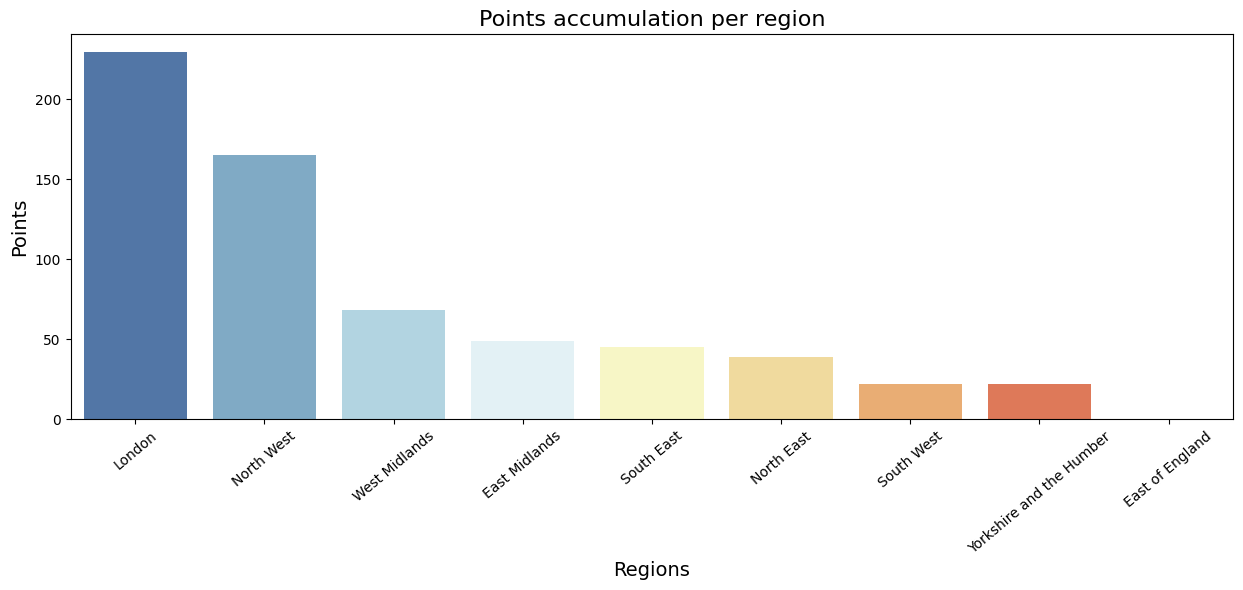

In [25]:
# Finally, is moment to create a chart using seaborn
# Figure size
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='regions', y='points', data=regions_df, palette="RdYlBu_r", hue='regions', legend=False)
# Graph title. 
plt.title('Points accumulation per region', fontsize=16)
# X label title. 
plt.xlabel('Regions', fontsize=14)
plt.ylabel('Points', fontsize=14)
# Rotating x-axis labels and show the plot.
plt.xticks(rotation=40)
plt.show()

## Big 6 performance

If you are a fan of the english football, probably you know that the Premier league is dominated for 6 big teams. These teams are Arsenal, Manchester City, Manchester United, Liverpool, Spurs, and Chelsea. The six teams are known as the Big 6. For this section we are going to take a closer look of the performances of these teams, and compare their performances from date 1 to the final date 28.  

To do that, let's create a new dictionary with two list. The first will be the dates (1-28) and the second will be how many points the teams had accumulated up to that date. 

In [26]:
# Dictionary creation.
bix_6_performance = {
    "dates": ['date 0'],
    "Arsenal": [0],
    "Chelsea": [0],
    "Liverpool": [0],
    "Manchester City": [0],
    "Manchester United": [0],
    "Tottenham Hotspur": [0],
}
# now we complete the list with the remaining dates.
def complete_dict(dict):
    for date_number in range(1, 39):
        dict["dates"].append('date %s' % date_number)
    return dict
bix_6_performance = complete_dict(bix_6_performance)
# A list with the names of the big 6 is necessary too. 
big_6 = ['Arsenal', 'Chelsea', 'Liverpool', 'Manchester City', 'Manchester United', 'Tottenham Hotspur']

Next step is use the list 'big_6' and the 'Win At Home' column created in the section 'Which is the strongest team at home?' to filter the results of these teams in the data set. Every time they have won beign locals or the local team has lost when their were visitors they will add 3 points, 1 in case of draw and 0 for loss. The sum of points will change on each date, for example, if they won on the date 1 they would have 3 points for date 1, then if they tied on date 2 they would have 4 points for that date, and then if they lost on date 3 they would have 4 points for that date. 

In [27]:
# Let's filter for the big 6
premier_b6 = premier[['Home Team', 'Goals Home', 'Away Team', 'Away Goals', 'Win At Home']]
premier_b6 = premier[premier['Home Team'].isin(big_6) | premier['Away Team'].isin(big_6)]
# Let's check the lenght due confirm the filter worked good. The lenght should be 198.
# If each of them play 38 games per season that is (38 * 6), on that substract the times they played each other that is (5 * 6)
# (19 * 6) - (5 * 6) = 198
len(premier_b6)

198

In [28]:
# Now is moment to fill the dictionay's 'points' list.
def count_points(home_team, away_team, win_at_home, big_6, dict):
    # In the scenarios when two teams of the big 6 face each other. 
    if (home_team in big_6) and (away_team in big_6):
        if win_at_home == 2:
            dict[home_team].append(dict[home_team][-1] + 3)
            dict[away_team].append(dict[away_team][-1] + 0)
        elif win_at_home == 1:
            dict[home_team].append(dict[home_team][-1] + 1)
            dict[away_team].append(dict[away_team][-1] + 1)
        elif win_at_home == 0:
            dict[home_team].append(dict[home_team][-1] + 0)
            dict[away_team].append(dict[away_team][-1] + 3)
    else:
        # In the scenarios when one team in the big 6 is playing as local.
        if home_team in big_6:
            if win_at_home == 2:
                dict[home_team].append(dict[home_team][-1] + 3)
            elif win_at_home == 1:
                dict[home_team].append(dict[home_team][-1] + 1)
            elif win_at_home == 0:
                dict[home_team].append(dict[home_team][-1] + 0)
        # In the scenarios when one team in the big 6 is playing as visitor.
        else:
            if win_at_home == 0:
                dict[away_team].append(dict[away_team][-1] + 3)
            elif win_at_home == 1:
                dict[away_team].append(dict[away_team][-1] + 1)
            elif win_at_home == 2:
                dict[away_team].append(dict[away_team][-1] + 0)
    return dict

In [29]:
premier_b6.apply(lambda row: count_points(row['Home Team'], row['Away Team'], row['Win At Home'], big_6, bix_6_performance), axis=1)

0      {'dates': ['date 0', 'date 1', 'date 2', 'date...
2      {'dates': ['date 0', 'date 1', 'date 2', 'date...
3      {'dates': ['date 0', 'date 1', 'date 2', 'date...
6      {'dates': ['date 0', 'date 1', 'date 2', 'date...
8      {'dates': ['date 0', 'date 1', 'date 2', 'date...
                             ...                        
372    {'dates': ['date 0', 'date 1', 'date 2', 'date...
373    {'dates': ['date 0', 'date 1', 'date 2', 'date...
377    {'dates': ['date 0', 'date 1', 'date 2', 'date...
378    {'dates': ['date 0', 'date 1', 'date 2', 'date...
379    {'dates': ['date 0', 'date 1', 'date 2', 'date...
Length: 198, dtype: object

In [30]:
print(bix_6_performance)

{'dates': ['date 0', 'date 1', 'date 2', 'date 3', 'date 4', 'date 5', 'date 6', 'date 7', 'date 8', 'date 9', 'date 10', 'date 11', 'date 12', 'date 13', 'date 14', 'date 15', 'date 16', 'date 17', 'date 18', 'date 19', 'date 20', 'date 21', 'date 22', 'date 23', 'date 24', 'date 25', 'date 26', 'date 27', 'date 28', 'date 29', 'date 30', 'date 31', 'date 32', 'date 33', 'date 34', 'date 35', 'date 36', 'date 37', 'date 38'], 'Arsenal': [0, 3, 3, 3, 6, 9, 9, 10, 11, 12, 15, 18, 21, 24, 27, 30, 33, 33, 34, 34, 37, 40, 41, 44, 47, 50, 53, 56, 57, 60, 63, 66, 69, 69, 72, 75, 78, 81, 84], 'Chelsea': [0, 1, 1, 1, 2, 5, 5, 5, 5, 5, 6, 6, 7, 10, 13, 13, 13, 14, 15, 16, 19, 19, 19, 20, 23, 23, 23, 23, 24, 25, 28, 31, 34, 37, 37, 40, 40, 41, 44], 'Liverpool': [0, 1, 2, 5, 8, 11, 14, 17, 20, 23, 24, 25, 25, 25, 28, 31, 32, 35, 38, 38, 39, 39, 39, 42, 45, 48, 51, 51, 51, 54, 57, 57, 58, 59, 62, 65, 65, 66, 67], 'Manchester City': [0, 0, 1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 38, 41, 44

In [31]:
# Let's convert the dictionary into a data frame.
b6_df = pd.DataFrame(bix_6_performance)
b6_df.head(7)

dates  Arsenal  Chelsea  Liverpool  Manchester City  Manchester United  \
0  date 0        0        0          0                0                  0   
1  date 1        3        1          1                0                  3   
2  date 2        3        1          2                1                  6   
3  date 3        3        1          5                4                  9   
4  date 4        6        2          8                7                 12   
5  date 5        9        5         11               10                 12   
6  date 6        9        5         14               13                 12   

   Tottenham Hotspur  
0                  0  
1                  3  
2                  3  
3                  3  
4                  6  
5                  6  
6                  7

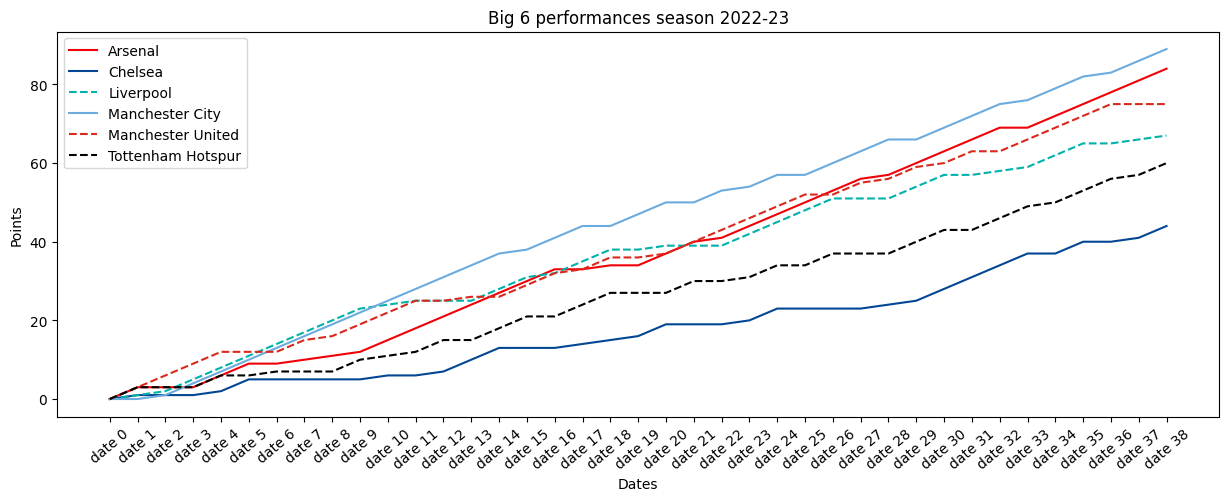

In [33]:
# Finally, let's compare the performances of these teams during the season in a line grapn.
# Figure size
plt.figure(figsize=(15, 5))
# Create a line plot using Seaborn
sns.lineplot(x='dates', y='Arsenal', data=b6_df, label='Arsenal', linestyle='-', color='#EF0107')
sns.lineplot(x='dates', y='Chelsea', data=b6_df, label='Chelsea', linestyle='-', color='#034694')
sns.lineplot(x='dates', y='Liverpool', data=b6_df, label='Liverpool', linestyle='--', color='#00B2A9')
sns.lineplot(x='dates', y='Manchester City', data=b6_df, label='Manchester City', linestyle='-', color='#6CABDD')
sns.lineplot(x='dates', y='Manchester United', data=b6_df, label='Manchester United', linestyle='--', color='#DA291C')
sns.lineplot(x='dates', y='Tottenham Hotspur', data=b6_df, label='Tottenham Hotspur', linestyle='--', color='black')

# Adding labels and title
plt.xlabel('Dates')
plt.ylabel('Points')
plt.title('Big 6 performances season 2022-23')

# Rotating x-axis labels and show the plot.
plt.xticks(rotation=40)
plt.show()